In [1]:
import pandas as pd

# Load the CSV file
file_path = "ScanRecords.csv"  # Replace with the actual path to your CSV file
try:
    data = pd.read_csv(file_path)
    print("CSV file loaded successfully!")
    print(data.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


CSV file loaded successfully!
         Date   Time  Duration PatientType
0  2023-08-01   8.23  0.949176      Type 2
1  2023-08-01   8.49  0.479593      Type 1
2  2023-08-01   9.12  0.496112      Type 2
3  2023-08-01  10.26  0.691947      Type 2
4  2023-08-01  10.64  0.345412      Type 1


In [2]:
data

,Date,Time,Duration,PatientType
0,2023-08-01,8.23,0.949176,Type 2
1,2023-08-01,8.49,0.479593,Type 1
2,2023-08-01,9.12,0.496112,Type 2
3,2023-08-01,10.26,0.691947,Type 2
4,2023-08-01,10.64,0.345412,Type 1
...,...,...,...,...
613,2023-08-31,15.54,0.409158,Type 1
614,2023-08-31,15.62,0.447213,Type 2
615,2023-08-31,15.87,0.468037,Type 1
616,2023-08-31,16.49,0.713091,Type 2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson, expon
from sklearn.utils import resample


In [4]:
# Display summary statistics
print(data.describe())

# Separate data by patient type
type1_data = data[data['PatientType'] == 'Type 1']
type2_data = data[data['PatientType'] == 'Type 2']


             Time    Duration
count  618.000000  618.000000
mean    12.427362    0.524192
std      2.586324    0.180814
min      8.010000    0.093731
25%     10.232500    0.404489
50%     12.225000    0.485701
75%     14.687500    0.613319
max     17.000000    1.146789


In [5]:
# Calculate mean and standard deviation for scan durations
type1_durations = type1_data['Duration']
mean_type1_duration = np.mean(type1_durations)
std_type1_duration = np.std(type1_durations, ddof=1)  # Sample standard deviation

print(f"Type 1 - Mean Duration: {mean_type1_duration:.2f}, Std Dev: {std_type1_duration:.2f}")


Type 1 - Mean Duration: 0.43, Std Dev: 0.10


In [6]:
# Group by date to count daily arrivals
type1_arrivals_per_day = type1_data.groupby('Date').size()
mean_daily_arrivals_type1 = np.mean(type1_arrivals_per_day)

print(f"Type 1 - Mean Daily Arrivals: {mean_daily_arrivals_type1:.2f}")


Type 1 - Mean Daily Arrivals: 16.48


In [7]:
# Bootstrap for scan durations
n_iterations = 1000
bootstrap_means = []
bootstrap_stds = []

for _ in range(n_iterations):
    sample = resample(type1_durations)
    bootstrap_means.append(np.mean(sample))
    bootstrap_stds.append(np.std(sample, ddof=1))

# Confidence intervals
ci_mean = np.percentile(bootstrap_means, [2.5, 97.5])
ci_std = np.percentile(bootstrap_stds, [2.5, 97.5])

print(f"Bootstrap CI for Mean Duration: {ci_mean}")
print(f"Bootstrap CI for Std Dev of Duration: {ci_std}")


Bootstrap CI for Mean Duration: [0.42333228 0.44284844]
Bootstrap CI for Std Dev of Duration: [0.08980137 0.10501694]


In [8]:
# Calculate relevant statistics
type2_durations = type2_data['Duration']
mean_type2_duration = np.mean(type2_durations)
median_type2_duration = np.median(type2_durations)
quantiles_type2 = np.percentile(type2_durations, [25, 50, 75])

print(f"Type 2 - Mean Duration: {mean_type2_duration:.2f}, Median: {median_type2_duration:.2f}, Quartiles: {quantiles_type2}")


Type 2 - Mean Duration: 0.67, Median: 0.65, Quartiles: [0.52396188 0.64660283 0.79652348]


In [9]:
# Bootstrap for scan durations
bootstrap_means_type2 = []
for _ in range(n_iterations):
    sample = resample(type2_durations)
    bootstrap_means_type2.append(np.mean(sample))

ci_mean_type2 = np.percentile(bootstrap_means_type2, [2.5, 97.5])
print(f"Bootstrap CI for Mean Duration (Type 2): {ci_mean_type2}")


Bootstrap CI for Mean Duration (Type 2): [0.64571253 0.6923403 ]


In [10]:
# Simulate daily arrivals and scan durations
simulated_arrivals = poisson.rvs(mean_daily_arrivals_type1, size=30)  # 30 days
simulated_durations = norm.rvs(mean_type1_duration, std_type1_duration, size=sum(simulated_arrivals))

print(f"Simulated Total Arrivals in 30 Days: {sum(simulated_arrivals)}")


Simulated Total Arrivals in 30 Days: 461


In [11]:
# Generate new durations using bootstrap resampling
simulated_durations_type2 = np.random.choice(type2_durations, size=100, replace=True)

print(f"Simulated Total Durations (Type 2): {len(simulated_durations_type2)}")


Simulated Total Durations (Type 2): 100


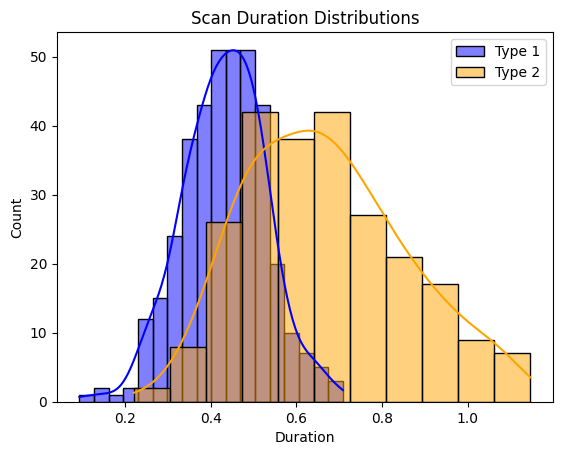

In [12]:
sns.histplot(type1_durations, kde=True, label="Type 1", color="blue")
sns.histplot(type2_durations, kde=True, label="Type 2", color="orange")
plt.legend()
plt.title("Scan Duration Distributions")
plt.show()


In [13]:
print(f"Type 1 Duration Mean (Simulated): {np.mean(simulated_durations):.2f}")
print(f"Type 2 Duration Mean (Simulated): {np.mean(simulated_durations_type2):.2f}")


Type 1 Duration Mean (Simulated): 0.44
Type 2 Duration Mean (Simulated): 0.66
